In [1]:
import pandas as pd
import numpy as np

In [93]:
import seaborn as sns

In [119]:
import matplotlib.pyplot as plt

In [144]:
import sqlite3

Join the data from Part 1 with the data from Part 2 to create a new dataframe.

In [7]:
Bike_Stations = pd.read_csv('Bike_Stations.csv')

In [8]:
FourSquare = pd.read_csv('FourSquare.csv')

In [9]:
Yelp = pd.read_csv('yelp_df.csv')

In [73]:
Yelp_Rating_Distance = Yelp.groupby(['yelp_index']).min('yelp_distance')

In [80]:
Bike_Stations_Joined = pd.merge(Bike_Stations.reset_index(),FourSquare.reset_index(), on='index', how='inner')

In [83]:
Yelp_Rating_Distance = Yelp_Rating_Distance.reset_index()

In [85]:
Bike_Stations_Joined = pd.merge(Bike_Stations_Joined,Yelp_Rating_Distance, left_on='index', right_on = 'yelp_index', how='inner')

In [86]:
Bike_Stations_Joined

,index,latitude,longitude,available_bikes,empty_slots,name,Restuarant Distance,Station Distance,yelp_index,yelp_rating,yelp_distance
0,0,25.729275,-80.241581,5,11,000605 - Virginia St & Florida Ave,80,0,0,5.0,173.754030
1,1,25.732522,-80.233244,7,9,000606 - S Bayshor Dr & Aviation Ave,80,0,1,5.0,540.432571
2,2,25.751100,-80.202641,5,9,000612 - SE Brickell Ave & 25th Rd,238,0,2,4.0,305.416309
3,3,25.760082,-80.196217,7,9,000616 - 150 SW 15th Road,239,0,3,5.0,109.908894
4,4,25.761884,-80.193101,10,4,000617 - S Miami Ave & 13th Street,44,0,4,5.0,133.216789
...,...,...,...,...,...,...,...,...,...,...,...
159,159,25.785199,-80.140549,0,15,000145 - 14th & Alton,121,0,159,5.0,222.801721
160,160,25.797583,-80.132518,3,13,000199 - Washington Ave & Dade Blvd,196,0,160,5.0,20.431553
161,161,25.776130,-80.194220,6,0,000674 - 48 NW 2nd Street,116,181,161,5.0,28.004793
162,162,25.776620,-80.141910,15,9,000130 - West Ave 6-7 St (Canopy Park),233,0,162,4.5,317.559921


In [114]:
Bike_Stations_Joined.rename(columns={'Restuarant Distance': 'FS Restaurant Distance'}, inplace=True)

Provide a visualization that you used as part of your EDA process. Explain the initial pattern or relationship you discoved through this visualization. 

In [115]:
Bike_Stations_Joined['Bike_Usage'] = round(Bike_Stations_Joined['empty_slots']/(Bike_Stations_Joined['available_bikes']+Bike_Stations_Joined['empty_slots'])*100,2).fillna(0)

In [116]:
Bike_Stations_Joined

,index,latitude,longitude,available_bikes,empty_slots,name,FS Restaurant Distance,Station Distance,yelp_index,yelp_rating,yelp_distance,Bike_Usage
0,0,25.729275,-80.241581,5,11,000605 - Virginia St & Florida Ave,80,0,0,5.0,173.754030,68.75
1,1,25.732522,-80.233244,7,9,000606 - S Bayshor Dr & Aviation Ave,80,0,1,5.0,540.432571,56.25
2,2,25.751100,-80.202641,5,9,000612 - SE Brickell Ave & 25th Rd,238,0,2,4.0,305.416309,64.29
3,3,25.760082,-80.196217,7,9,000616 - 150 SW 15th Road,239,0,3,5.0,109.908894,56.25
4,4,25.761884,-80.193101,10,4,000617 - S Miami Ave & 13th Street,44,0,4,5.0,133.216789,28.57
...,...,...,...,...,...,...,...,...,...,...,...,...
159,159,25.785199,-80.140549,0,15,000145 - 14th & Alton,121,0,159,5.0,222.801721,100.00
160,160,25.797583,-80.132518,3,13,000199 - Washington Ave & Dade Blvd,196,0,160,5.0,20.431553,81.25
161,161,25.776130,-80.194220,6,0,000674 - 48 NW 2nd Street,116,181,161,5.0,28.004793,0.00
162,162,25.776620,-80.141910,15,9,000130 - West Ave 6-7 St (Canopy Park),233,0,162,4.5,317.559921,37.50


In [216]:
Bike_Stations_Joined.to_csv("Bike_Stations_Joined.csv", index = False)

In [123]:
relevant_metrics = Bike_Stations_Joined[['Bike_Usage', 'FS Restaurant Distance', 'Station Distance', 'yelp_distance']].copy()


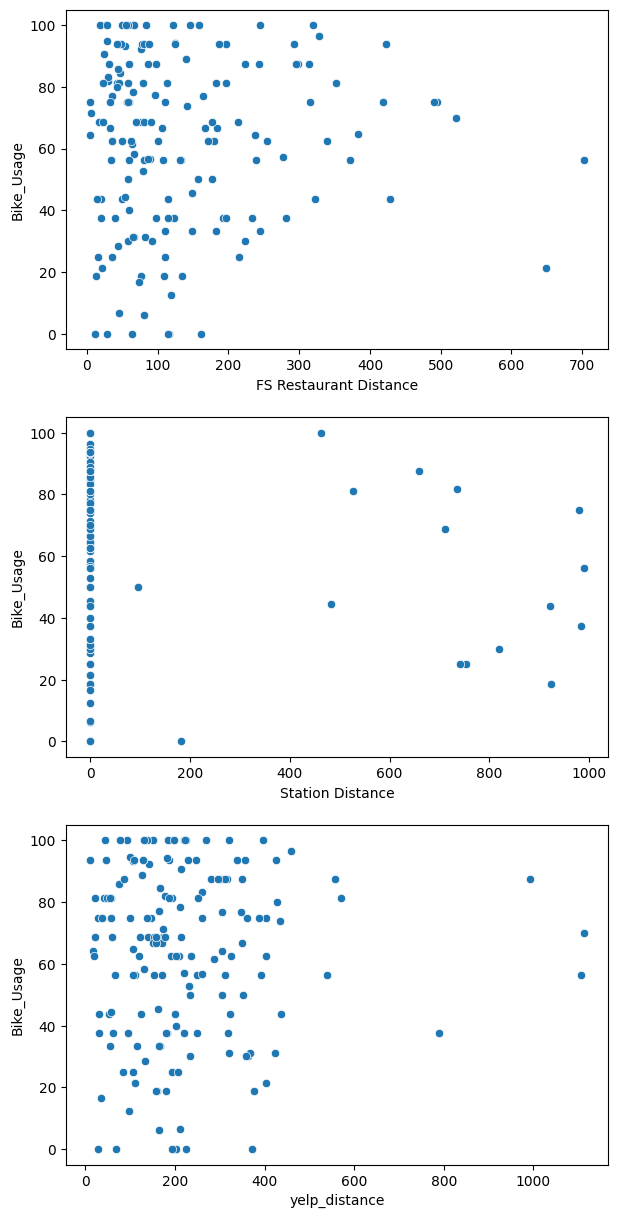

In [131]:
fig, ax = plt.subplots(3, 1, figsize=(7,15))

sns.scatterplot(x=relevant_metrics['FS Restaurant Distance'], y=relevant_metrics['Bike_Usage'], ax=ax[0])
sns.scatterplot(x=relevant_metrics['Station Distance'], y=relevant_metrics['Bike_Usage'], ax=ax[1])
sns.scatterplot(x=relevant_metrics['yelp_distance'], y=relevant_metrics['Bike_Usage'], ax=ax[2])
plt.show()

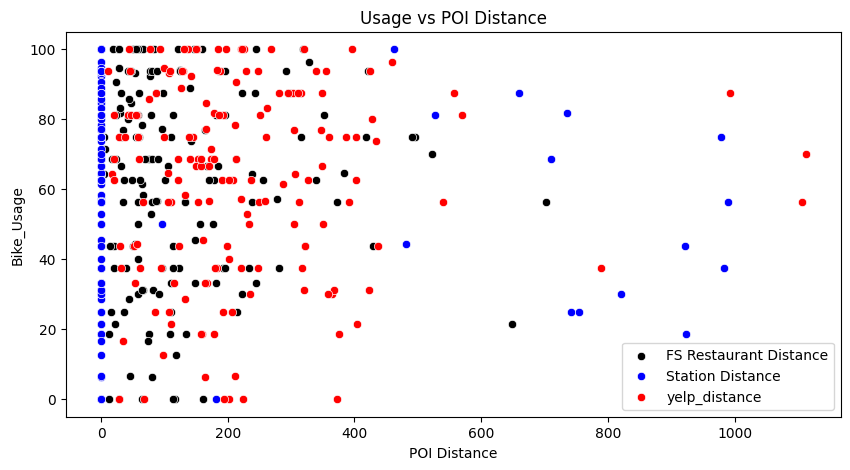

In [220]:
fig, ax = plt.subplots(figsize=(10,5))

sns.scatterplot(x=relevant_metrics['FS Restaurant Distance'], y=relevant_metrics['Bike_Usage'], ax=ax, color = 'black')
sns.scatterplot(x=relevant_metrics['Station Distance'], y=relevant_metrics['Bike_Usage'], ax=ax, color = 'blue')
sns.scatterplot(x=relevant_metrics['yelp_distance'], y=relevant_metrics['Bike_Usage'], ax=ax, color = 'red')
plt.xlabel('POI Distance')
plt.title('Usage vs POI Distance')
plt.legend(labels= ['FS Restaurant Distance','Station Distance','yelp_distance'])
plt.show()

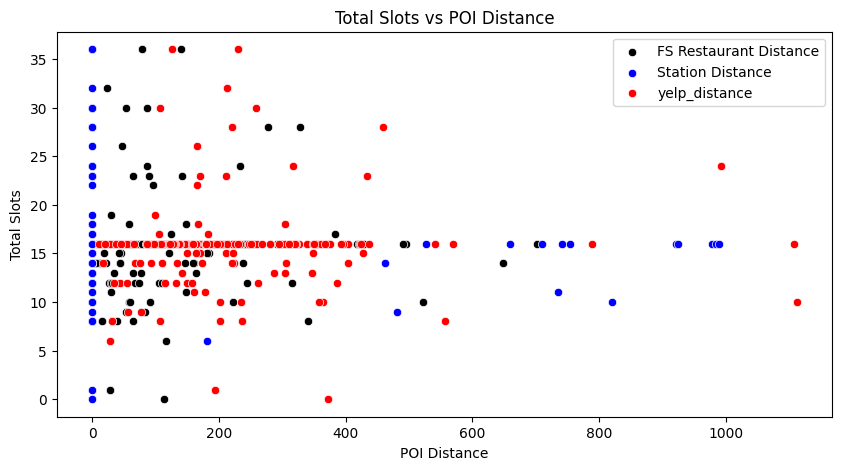

In [221]:
fig, ax = plt.subplots(figsize=(10,5))

sns.scatterplot(x=Bike_Stations_Joined['FS Restaurant Distance'], y=(Bike_Stations_Joined['available_bikes']+Bike_Stations_Joined['empty_slots']), ax=ax, color = 'black')
sns.scatterplot(x=Bike_Stations_Joined['Station Distance'], y=(Bike_Stations_Joined['available_bikes']+Bike_Stations_Joined['empty_slots']), ax=ax, color = 'blue')
sns.scatterplot(x=Bike_Stations_Joined['yelp_distance'], y=(Bike_Stations_Joined['available_bikes']+Bike_Stations_Joined['empty_slots']), ax=ax, color = 'red')
plt.ylabel('Total Slots')
plt.xlabel('POI Distance')
plt.title('Total Slots vs POI Distance')
plt.legend(labels= ['FS Restaurant Distance','Station Distance','yelp_distance'])
plt.show()

# Database

Put all your results in an SQLite3 database (remember, SQLite stores its databases as files in your local machine - make sure to create your database in your project's data/ directory!)

In [173]:
connection = sqlite3.connect("BikeStations_Corrected.db")

In [174]:
cursur = connection.cursor()

In [175]:
Bike_Stations.to_sql('Stations', connection, if_exists='replace', index = True)
FourSquare.to_sql('FourSquare', connection, if_exists='replace', index = True)
Yelp_Rating_Distance.to_sql('Yelp_Rating_Distance', connection, if_exists='replace', index = False)

164

In [192]:
test = pd.read_sql("SELECT * FROM Yelp_Rating_Distance", connection)

In [193]:
test

,yelp_index,yelp_rating,yelp_distance
0,0,5.0,173.754030
1,1,5.0,540.432571
2,2,4.0,305.416309
3,3,5.0,109.908894
4,4,5.0,133.216789
...,...,...,...
159,159,5.0,222.801721
160,160,5.0,20.431553
161,161,5.0,28.004793
162,162,4.5,317.559921


In [206]:
query ="""SELECT * FROM Stations AS s 
            JOIN FourSquare AS f ON s."index" = f."index" 
            JOIN Yelp_Rating_Distance AS y ON s."index" = y.yelp_index"""

In [207]:
sql_df = pd.read_sql_query(query, connection)

In [208]:
sql_df

,index,latitude,longitude,available_bikes,empty_slots,name,index,Restuarant Distance,Station Distance,yelp_index,yelp_rating,yelp_distance
0,0,25.729275,-80.241581,5,11,000605 - Virginia St & Florida Ave,0,80,0,0,5.0,173.754030
1,1,25.732522,-80.233244,7,9,000606 - S Bayshor Dr & Aviation Ave,1,80,0,1,5.0,540.432571
2,2,25.751100,-80.202641,5,9,000612 - SE Brickell Ave & 25th Rd,2,238,0,2,4.0,305.416309
3,3,25.760082,-80.196217,7,9,000616 - 150 SW 15th Road,3,239,0,3,5.0,109.908894
4,4,25.761884,-80.193101,10,4,000617 - S Miami Ave & 13th Street,4,44,0,4,5.0,133.216789
...,...,...,...,...,...,...,...,...,...,...,...,...
159,159,25.785199,-80.140549,0,15,000145 - 14th & Alton,159,121,0,159,5.0,222.801721
160,160,25.797583,-80.132518,3,13,000199 - Washington Ave & Dade Blvd,160,196,0,160,5.0,20.431553
161,161,25.776130,-80.194220,6,0,000674 - 48 NW 2nd Street,161,116,181,161,5.0,28.004793
162,162,25.776620,-80.141910,15,9,000130 - West Ave 6-7 St (Canopy Park),162,233,0,162,4.5,317.559921


Look at the data before and after the join to validate your data.

In [209]:
Stations_SQL = pd.read_sql("SELECT * FROM Yelp_Rating_Distance", connection)

In [210]:
FourSquare_SQL = pd.read_sql("SELECT * FROM FourSquare", connection)

In [211]:
Yelp_Rating_Distance_SQL = pd.read_sql("SELECT * FROM Yelp_Rating_Distance", connection)

In [212]:
sql_df

,index,latitude,longitude,available_bikes,empty_slots,name,index,Restuarant Distance,Station Distance,yelp_index,yelp_rating,yelp_distance
0,0,25.729275,-80.241581,5,11,000605 - Virginia St & Florida Ave,0,80,0,0,5.0,173.754030
1,1,25.732522,-80.233244,7,9,000606 - S Bayshor Dr & Aviation Ave,1,80,0,1,5.0,540.432571
2,2,25.751100,-80.202641,5,9,000612 - SE Brickell Ave & 25th Rd,2,238,0,2,4.0,305.416309
3,3,25.760082,-80.196217,7,9,000616 - 150 SW 15th Road,3,239,0,3,5.0,109.908894
4,4,25.761884,-80.193101,10,4,000617 - S Miami Ave & 13th Street,4,44,0,4,5.0,133.216789
...,...,...,...,...,...,...,...,...,...,...,...,...
159,159,25.785199,-80.140549,0,15,000145 - 14th & Alton,159,121,0,159,5.0,222.801721
160,160,25.797583,-80.132518,3,13,000199 - Washington Ave & Dade Blvd,160,196,0,160,5.0,20.431553
161,161,25.776130,-80.194220,6,0,000674 - 48 NW 2nd Street,161,116,181,161,5.0,28.004793
162,162,25.776620,-80.141910,15,9,000130 - West Ave 6-7 St (Canopy Park),162,233,0,162,4.5,317.559921


In [213]:
Stations_SQL

,yelp_index,yelp_rating,yelp_distance
0,0,5.0,173.754030
1,1,5.0,540.432571
2,2,4.0,305.416309
3,3,5.0,109.908894
4,4,5.0,133.216789
...,...,...,...
159,159,5.0,222.801721
160,160,5.0,20.431553
161,161,5.0,28.004793
162,162,4.5,317.559921


In [214]:
FourSquare

,Restuarant Distance,Station Distance
0,80,0
1,80,0
2,238,0
3,239,0
4,44,0
...,...,...
159,121,0
160,196,0
161,116,181
162,233,0


In [215]:
Stations_SQL

,yelp_index,yelp_rating,yelp_distance
0,0,5.0,173.754030
1,1,5.0,540.432571
2,2,4.0,305.416309
3,3,5.0,109.908894
4,4,5.0,133.216789
...,...,...,...
159,159,5.0,222.801721
160,160,5.0,20.431553
161,161,5.0,28.004793
162,162,4.5,317.559921


In [222]:
connection.close()